In [ ]:
!pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.5 MB/s 
  Created wheel for jcopml: filename=jcopml-1.1.15-py2.py3-none-any.whl size=32026 sha256=1a601deb3556a5c815b47d994e0d209ec498fd4569949f772efc95167884da12
  Stored in directory: /root/.cache/pip/wheels/43/7a/bb/396851d7ac5c4c9342ec8657593da1eee1bad1854e54d51d81
Successfully built jcopml


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import missingno as msno
warnings.simplefilter(action="ignore", category=FutureWarning)

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [ ]:
df = pd.read_csv('churn-bigml-80.csv')
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


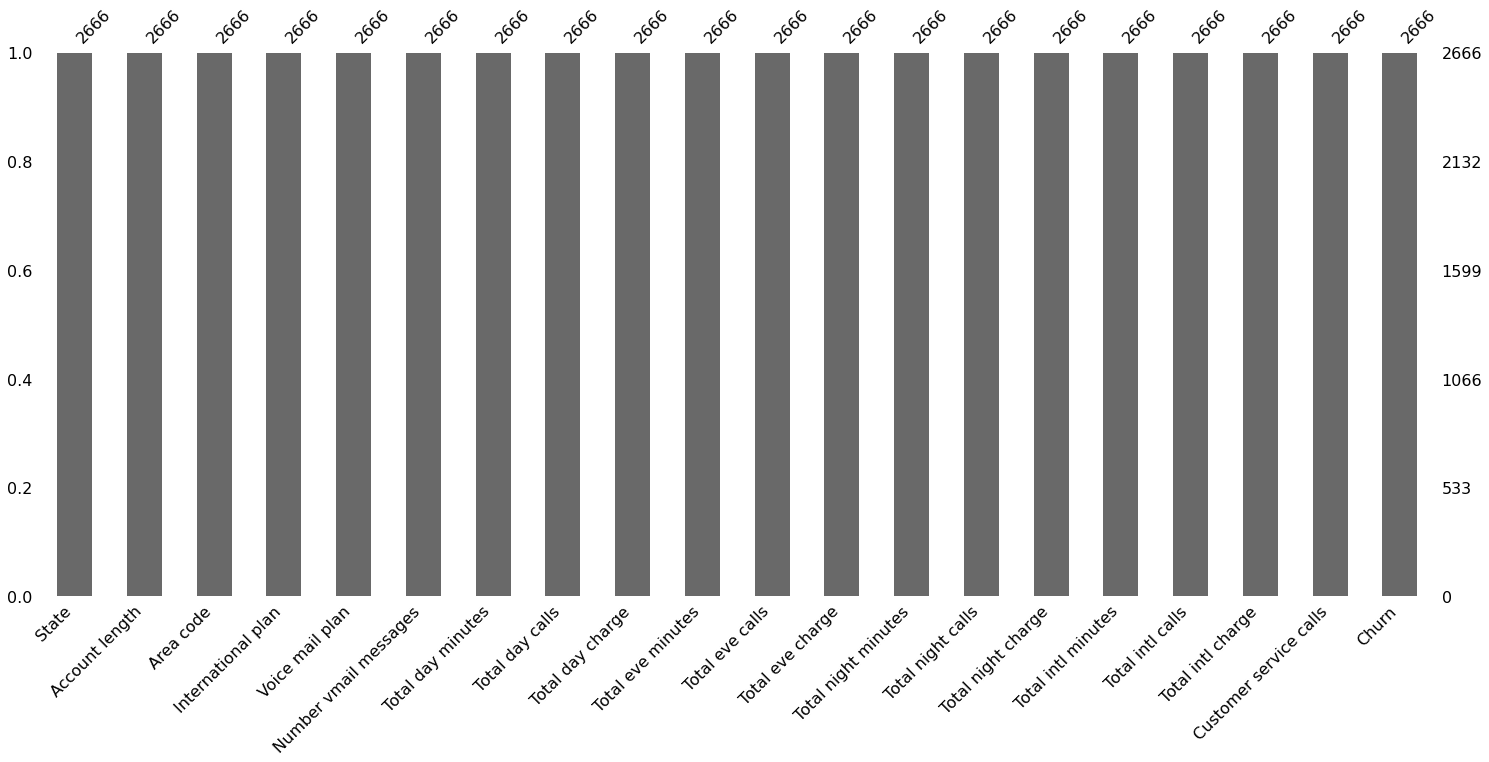

In [ ]:
msno.bar(df)

,missing_value,%
State,0,0.0
Account length,0,0.0
Area code,0,0.0
International plan,0,0.0
Voice mail plan,0,0.0
Number vmail messages,0,0.0
Total day minutes,0,0.0
Total day calls,0,0.0
Total day charge,0,0.0
Total eve minutes,0,0.0


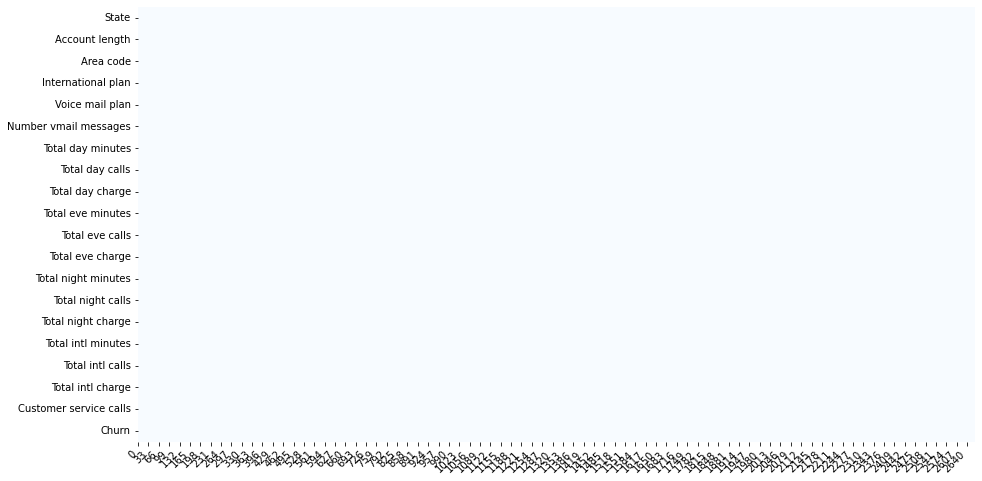

In [ ]:
plot_missing_value(df, return_df=True)

In [ ]:
from jcopml.plot import plot_association_matrix, plot_correlation_matrix

In [ ]:
plot_association_matrix(df,"Churn", categoric_col='auto')

interactive(children=(ToggleButtons(description='method', options=("Cramer's V", 'Proficiency U(X|Y)', 'Profic…

In [ ]:
df.Churn.value_counts()

False    2278
True      388
Name: Churn, dtype: int64

### Dataset Spliting

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Churn')
y = df.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2132, 19), (534, 19), (2132,), (534,))

### Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [ ]:
X_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
1229,MD,102,415,No,No,0,271.1,80,46.09,172.0,133,14.62,169.2,105,7.61,10.3,5,2.78,1
2001,MT,157,408,No,No,0,240.2,67,40.83,153.0,98,13.01,249.0,72,11.21,10.2,6,2.75,2
1421,TX,79,415,No,No,0,144.0,90,24.48,135.8,91,11.54,212.4,129,9.56,13.0,4,3.51,1
1346,NM,132,408,No,No,0,169.9,107,28.88,209.4,121,17.80,206.1,79,9.27,11.5,2,3.11,1
86,AZ,95,408,No,No,0,238.1,65,40.48,187.2,98,15.91,190.0,115,8.55,11.8,4,3.19,4


In [ ]:
preprocessor = ColumnTransformer([
                                  ('numeric', num_pipe(scaling='standard', transform='yeo-johnson'), ['Account length', 'Area code', 'Number vmail messages', 'Total day minutes',
                                                                                          'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls',
                                                                                          'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge',
                                                                                          'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']),
                                  ('categoric', cat_pipe(encoder='onehot'), ['State', 'International plan', 'Voice mail plan']),
])

pipeline = Pipeline([
                     ('prep', preprocessor),
                     ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])

model = GridSearchCV(pipeline, gsp.logreg_params, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/jcopml/pipeline/_pipeline.py:65: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 5 folds for each of 14 candidates, totalling 70 fits
{'algo__C': 0.1, 'algo__fit_intercept': True}
0.8771106941838649 0.8520599250936329


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [ ]:
from jcopml.feature_importance import mean_score_decrease

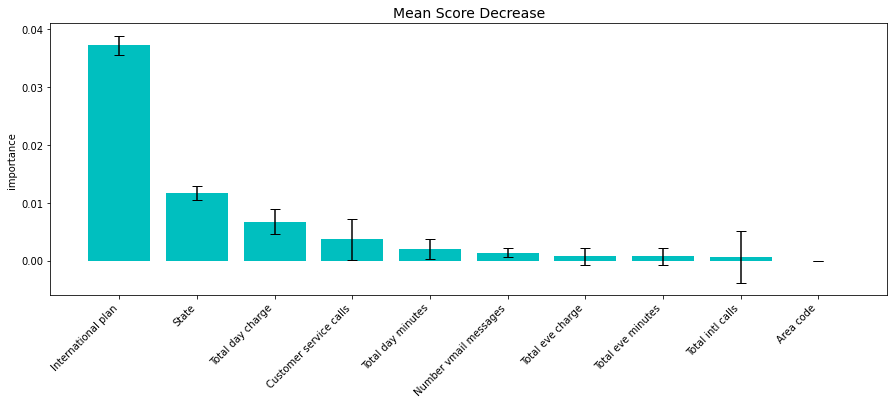

In [ ]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

In [ ]:
from jcopml.plot import plot_confusion_matrix, plot_classification_report, plot_roc_curve, plot_pr_curve

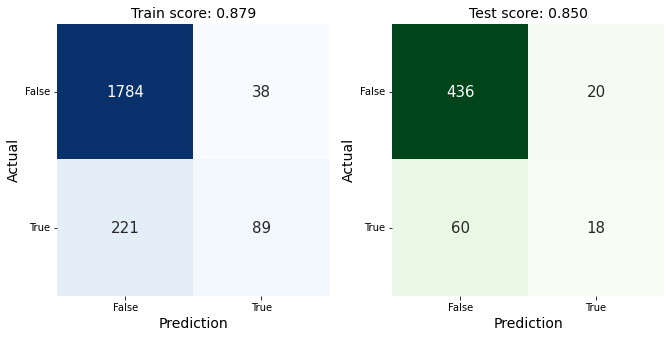

In [ ]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

In [ ]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      1822
        True       0.70      0.29      0.41       310

    accuracy                           0.88      2132
   macro avg       0.80      0.63      0.67      2132
weighted avg       0.86      0.88      0.86      2132


Test report
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       456
        True       0.47      0.23      0.31        78

    accuracy                           0.85       534
   macro avg       0.68      0.59      0.61       534
weighted avg       0.82      0.85      0.83       534



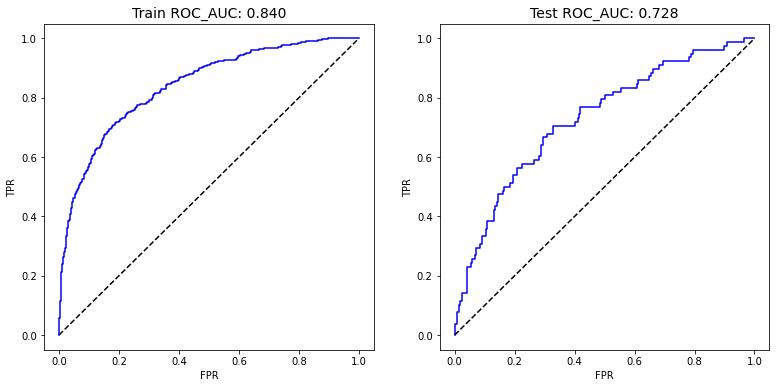

In [ ]:
plot_roc_curve(X_train, y_train, X_test, y_test, model)

In [ ]:
def submit(model, filename="Logistik_Regression_Test.csv"):
  df_submit = pd.read_csv("churn-bigml-20.csv")
  df_submit['Churn'] = model.predict(df_submit)
  df_submit[['Churn']].to_csv(filename)

In [ ]:
submit(model, filename="Logistik_Regression_Test.csv")